# IMPORT LIBARY

In [961]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
import warnings
warnings.filterwarnings('ignore')

# DATA UNDERSTANDING

In [962]:
import os
for dirname, _, filenames in os.walk('/project/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/project/data/.DS_Store
/project/data/gender_submission.csv
/project/data/test.csv
/project/data/train.csv
/project/data/.ipynb_checkpoints/dataset-checkpoint.txt


In [963]:
train = pd.read_csv('/project/data/train.csv')
test = pd.read_csv('/project/data/test.csv')

In [964]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [965]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [966]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [967]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Combine training and test data

In [968]:
alldata = pd.concat([train, test], axis = 0, ignore_index = True)

In [969]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [970]:
alldata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


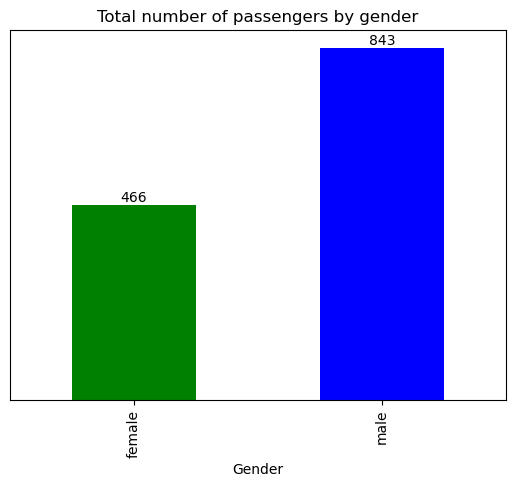

In [971]:
ax = alldata.groupby('Sex').size().plot.bar(color=['green', 'blue'])
plt.title('Total number of passengers by gender')
plt.xlabel('Gender')
plt.yticks([])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

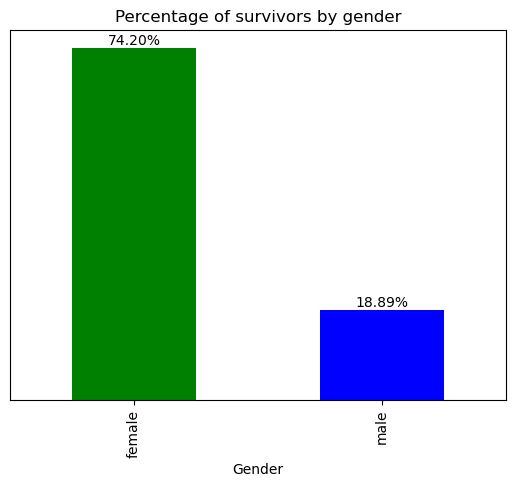

In [972]:
ax = train.groupby('Sex')['Survived'].mean().plot.bar(
    color = ['green', 'blue']
)
plt.title('Percentage of survivors by gender')
plt.xlabel('Gender')
plt.yticks([])

# formatting function
def fmt(x):
    return f'{x:.2%}'

# Add percentage values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[fmt(x) for x in i.datavalues])
plt.show()

# DATA PREPARATION

### Feature Engineering

##### Extracting Title from feature `name`

In [973]:
train.Name[:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [974]:
# Create Title column by extracting title from Name column by using regular expression https://regexr.com/
alldata['title'] = alldata.Name.apply(lambda x: re.search(r',\s(.+?)\.', x).group(1))

In [975]:
alldata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [976]:
alldata.title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: title, dtype: int64

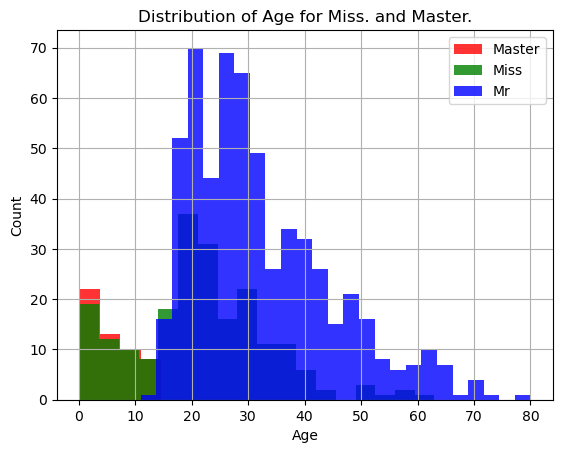

In [977]:
alldata.loc[alldata.title == 'Master', 'Age'].hist(
alpha = 0.8, bins = 4, color = 'red', label='Master')

alldata.loc[alldata.title == 'Miss', 'Age'].hist(
alpha = 0.8, bins = 18, color = 'green', label = 'Miss')

alldata.loc[alldata.title == 'Mr', 'Age'].hist(
alpha = 0.8, bins= 25, color = 'blue', label = 'Mr')

plt.title('Distribution of Age for Miss. and Master.')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<img src="./img/group_title.png" alt="Alternative text" />

In [978]:
# Reclassify common titles
alldata.loc[alldata.title.isin(['Ms', 'Mlle']), 'title'] = 'Miss'
alldata.loc[alldata.title.isin(['Mme']), 'title'] = 'Mrs'

In [979]:
# Reclassify uncommon titles
rare = ['Major', 'Lady', 'Sir', 'Don', 'Capt', 'the Countess', 'Jonkheer', 'Dona', 'Dr', 'Rev', 'Col']
alldata.loc[alldata.title.isin(rare), 'title'] = 'rare'

In [980]:
alldata.title.value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
rare       29
Name: title, dtype: int64

##### Women and children first

In [981]:
alldata['surname'] = alldata.Name.apply(lambda x: re.search(r'^(.+?)\,', x).group(1))

In [982]:
alldata.surname[:10]

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
5        Moran
6     McCarthy
7      Palsson
8      Johnson
9       Nasser
Name: surname, dtype: object

##### `in_WCF`: Based on the survival rate of passengers with the same surname. If the passenger is a woman or child, this feature is set to 1; otherwise, it’s set to 0.
##### `WCF_Survived`:  WCF group with a survival rate greater than 50%, this feature is set to 1; otherwise, it’s set to 0.
##### `WCF_Died`: WCF group with a survival rate less than 50%, this feature is set to 1; otherwise, it’s set to 0.

In [983]:
# Contains surnames for WCF groups
alldata['surname_WCF'] = alldata.surname

In [984]:
# Take out adult males but we keep boys (Master)
alldata.loc[((alldata.Sex == 'male') & (alldata.title == 'Mr'))|
             ((alldata.Sex == 'male') & (alldata.title == 'rare')), 'surname_WCF'] = np.nan

In [985]:
# WCF_count counts the number of passenger for each surname group (in_WCF)
alldata['WCF_count'] = alldata.groupby('surname_WCF')['surname_WCF'].transform('count')
alldata.loc[(alldata.WCF_count < 2.0 ), 'surname_WCF'] = np.nan

In [986]:
# Group data in WCF
alldata.loc[(alldata.WCF_count >= 2.0), 'in_WCF'] = 1
alldata.loc[(alldata.WCF_count < 2.0 ), 'in_WCF'] = 0

In [987]:
# Seperate WCF_Survived & WCF_Died 
for surname in alldata.surname_WCF.unique():
    surv_rate = np.mean(alldata.loc[alldata.surname_WCF == surname, 'Survived'])
    if surv_rate > 0.5:
        alldata.loc[alldata.surname_WCF == surname, 'WCF_Survived'] = 1
    else:
        alldata.loc[alldata.surname_WCF == surname, 'WCF_Died'] = 1

In [988]:
# Fillna in the new features 
alldata[['in_WCF', 'WCF_Survived', 'WCF_Died']] = alldata[['in_WCF', 'WCF_Survived', 'WCF_Died']].fillna(0)

In [989]:
# Drop features no longer needed
alldata.drop(columns=['Name', 'surname', 'surname_WCF', 'WCF_count'], axis = 1, inplace = True)

In [990]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Sex           1309 non-null   object 
 4   Age           1046 non-null   float64
 5   SibSp         1309 non-null   int64  
 6   Parch         1309 non-null   int64  
 7   Ticket        1309 non-null   object 
 8   Fare          1308 non-null   float64
 9   Cabin         295 non-null    object 
 10  Embarked      1307 non-null   object 
 11  title         1309 non-null   object 
 12  in_WCF        1309 non-null   float64
 13  WCF_Died      1309 non-null   float64
 14  WCF_Survived  1309 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 153.5+ KB


In [991]:
alldata.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,in_WCF,WCF_Died,WCF_Survived
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0.0,0.0,0.0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0.0,0.0,0.0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0.0,0.0,0.0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,0.0,0.0,0.0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0.0,0.0,0.0


#### Find same family on the Titanic - family_size, ticket_group_count, groupsize, and is_alone features

In [992]:
print(f"There were passengers who shared tickets is: {len(alldata) - len(alldata.Ticket.unique())}")

There were passengers who shared tickets is: 380


##### Find people are in same family

In [993]:
alldata['family_size'] = alldata.SibSp + alldata.Parch + 1
alldata['ticket_group_count'] = alldata.groupby('Ticket')['Ticket'].transform('count')

In [994]:
print(f"The passenger that match features `family_size` and `ticket_group_count` is: {len(alldata[alldata.family_size == alldata.ticket_group_count])}")

The passenger that match features `family_size` and `ticket_group_count` is: 1025


In [995]:
print(f"There is a mismatch of {len(alldata) - len(alldata[alldata.family_size == alldata.ticket_group_count])}")

There is a mismatch of 284


In [996]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         1309 non-null   int64  
 1   Survived            891 non-null    float64
 2   Pclass              1309 non-null   int64  
 3   Sex                 1309 non-null   object 
 4   Age                 1046 non-null   float64
 5   SibSp               1309 non-null   int64  
 6   Parch               1309 non-null   int64  
 7   Ticket              1309 non-null   object 
 8   Fare                1308 non-null   float64
 9   Cabin               295 non-null    object 
 10  Embarked            1307 non-null   object 
 11  title               1309 non-null   object 
 12  in_WCF              1309 non-null   float64
 13  WCF_Died            1309 non-null   float64
 14  WCF_Survived        1309 non-null   float64
 15  family_size         1309 non-null   int64  
 16  ticket

##### Find people share tickets with others who are not their family. Maybe they are friends, colleagues and alone

In [997]:
alldata['group_size'] = alldata[['family_size', 'ticket_group_count']].max(axis = 1)
alldata['is_alone'] = alldata.group_size.apply(lambda x: 1 if x == 1 else 0)

In [998]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         1309 non-null   int64  
 1   Survived            891 non-null    float64
 2   Pclass              1309 non-null   int64  
 3   Sex                 1309 non-null   object 
 4   Age                 1046 non-null   float64
 5   SibSp               1309 non-null   int64  
 6   Parch               1309 non-null   int64  
 7   Ticket              1309 non-null   object 
 8   Fare                1308 non-null   float64
 9   Cabin               295 non-null    object 
 10  Embarked            1307 non-null   object 
 11  title               1309 non-null   object 
 12  in_WCF              1309 non-null   float64
 13  WCF_Died            1309 non-null   float64
 14  WCF_Survived        1309 non-null   float64
 15  family_size         1309 non-null   int64  
 16  ticket

In [999]:
alldata.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,in_WCF,WCF_Died,WCF_Survived,family_size,ticket_group_count,group_size,is_alone
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0.0,0.0,0.0,2,1,2,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0.0,0.0,0.0,2,2,2,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0.0,0.0,0.0,1,1,1,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,0.0,0.0,0.0,2,2,2,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0.0,0.0,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.0,3,male,NaN,0,0,374910,8.0500,NaN,S,Mr,0.0,0.0,0.0,1,1,1,1
96,97,0.0,1,male,71.0,0,0,PC 17754,34.6542,A5,C,Mr,0.0,0.0,0.0,1,1,1,1
97,98,1.0,1,male,23.0,0,1,PC 17759,63.3583,D10 D12,C,Mr,0.0,0.0,0.0,2,2,2,0
98,99,1.0,2,female,34.0,0,1,231919,23.0000,NaN,S,Mrs,1.0,0.0,1.0,2,2,2,0


### Navigating the Seas of Fare and Passenger Class

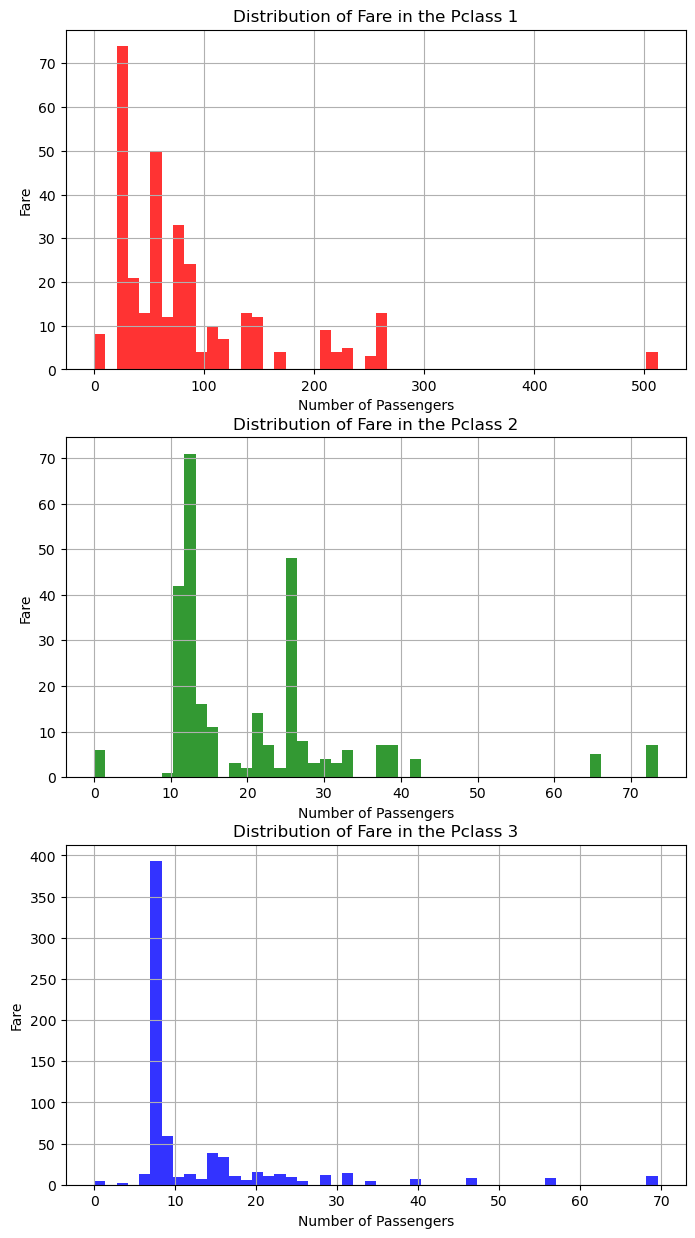

In [1000]:
#before transformation
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (8, 15))
colors = ['red', 'green', 'blue']
for i in range(3):
    alldata.loc[alldata.Pclass == i + 1, 'Fare'].hist(alpha = 0.8, ax = axs[i], bins = 50, color = colors[i])
    axs[i].set_title(f"Distribution of Fare in the Pclass {i+1}")
    axs[i].set_xlabel('Number of Passengers')
    axs[i].set_ylabel('Fare')

In [1001]:
#tranformation by add new feature
alldata['fare_pp'] = alldata.Fare / alldata.ticket_group_count

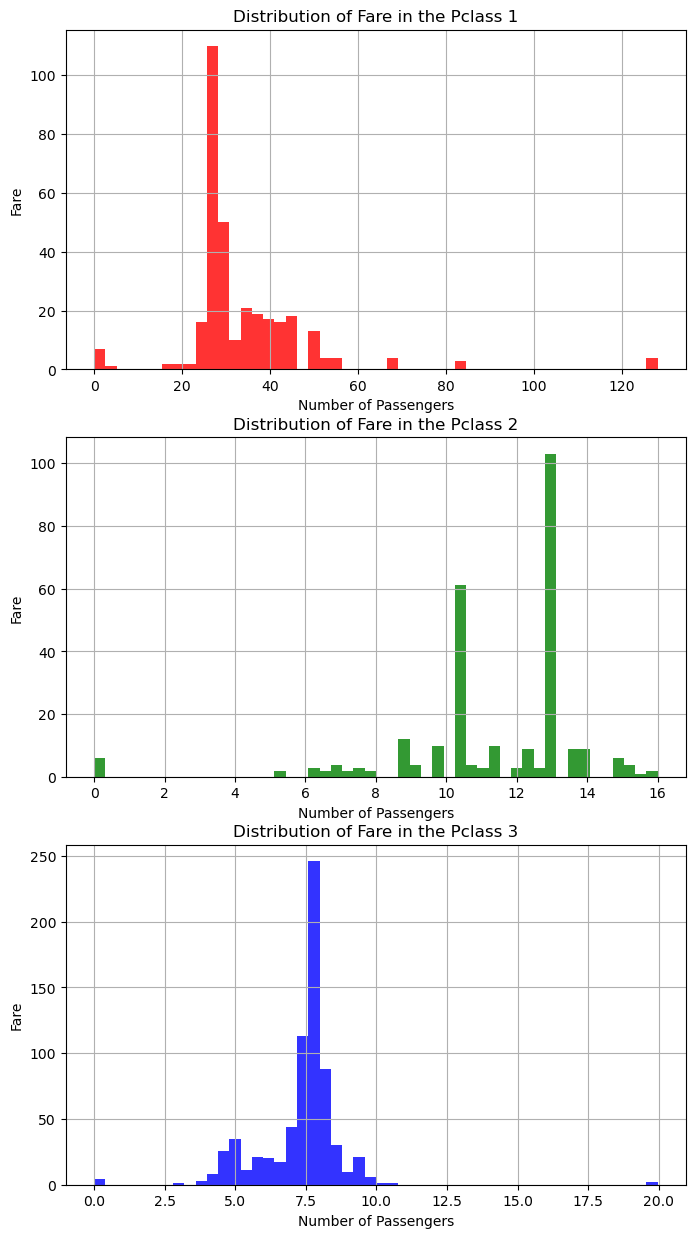

In [1002]:
# after transformation
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (8, 15))
colors = ['red', 'green', 'blue']
for i in range(3):
    alldata.loc[alldata.Pclass == i + 1, 'fare_pp'].hist(alpha = 0.8, ax = axs[i], bins = 50, color = colors[i])
    axs[i].set_title(f"Distribution of Fare in the Pclass {i+1}")
    axs[i].set_xlabel('Number of Passengers')
    axs[i].set_ylabel('Fare')

In [1003]:
# Drop features no longer needed
alldata.drop('Fare', axis = 1, inplace = True)
alldata.drop('Ticket', axis = 1, inplace = True)

In [1004]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         1309 non-null   int64  
 1   Survived            891 non-null    float64
 2   Pclass              1309 non-null   int64  
 3   Sex                 1309 non-null   object 
 4   Age                 1046 non-null   float64
 5   SibSp               1309 non-null   int64  
 6   Parch               1309 non-null   int64  
 7   Cabin               295 non-null    object 
 8   Embarked            1307 non-null   object 
 9   title               1309 non-null   object 
 10  in_WCF              1309 non-null   float64
 11  WCF_Died            1309 non-null   float64
 12  WCF_Survived        1309 non-null   float64
 13  family_size         1309 non-null   int64  
 14  ticket_group_count  1309 non-null   int64  
 15  group_size          1309 non-null   int64  
 16  is_alo

In [1005]:
#Show one missing value
alldata[alldata.fare_pp.isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,title,in_WCF,WCF_Died,WCF_Survived,family_size,ticket_group_count,group_size,is_alone,fare_pp
1043,1044,NaN,3,male,60.5,0,0,NaN,S,Mr,0.0,0.0,0.0,1,1,1,1,NaN


In [1006]:
alldata.groupby('Pclass')['fare_pp'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,33.910500,15.369762,0.0,26.550000,29.70,38.64375,128.0823
2,277.0,11.411010,2.632930,0.0,10.500000,12.35,13.00000,16.0000
3,708.0,7.329146,1.471362,0.0,7.060031,7.75,7.92500,19.9667


In [1007]:
#Fill missing value feature fare_pp by median
alldata.loc[alldata[alldata.fare_pp.isna()].index, 'fare_pp'] = alldata.groupby('Pclass')['fare_pp'].median()[3]

In [1008]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         1309 non-null   int64  
 1   Survived            891 non-null    float64
 2   Pclass              1309 non-null   int64  
 3   Sex                 1309 non-null   object 
 4   Age                 1046 non-null   float64
 5   SibSp               1309 non-null   int64  
 6   Parch               1309 non-null   int64  
 7   Cabin               295 non-null    object 
 8   Embarked            1307 non-null   object 
 9   title               1309 non-null   object 
 10  in_WCF              1309 non-null   float64
 11  WCF_Died            1309 non-null   float64
 12  WCF_Survived        1309 non-null   float64
 13  family_size         1309 non-null   int64  
 14  ticket_group_count  1309 non-null   int64  
 15  group_size          1309 non-null   int64  
 16  is_alo

### Categorizing Passengers by `Age`

##### Identify categories with higher survival rates to convert the Age feature into a discrete feature by using the k-means algorithm for 4 clusters.

In [1009]:
# Train age and test age 
train_age = alldata[alldata.Age.notnull()].copy()
test_age = alldata[alldata.Age.isna()].copy()

In [1010]:
# Fit to the data
kmeans = KMeans(n_clusters = 4, random_state = 41)
labels_pred = kmeans.fit_predict(train_age[['Age']])

In [1011]:
# Flatten array of the cluster centers from a fitted k-means clustering
kmeans.cluster_centers_.flatten()

array([21.5654321 , 52.97043011, 34.10814607,  5.31989899])

In [1012]:
# Sort the array in ascending order
np.argsort(kmeans.cluster_centers_.flatten())

array([3, 0, 2, 1])

In [1013]:
# dictionary to label the clusters
label_dict = {label: v for v, label in enumerate(np.argsort(kmeans.cluster_centers_.flatten()))}
label_dict 

{3: 0, 0: 1, 2: 2, 1: 3}

In [1014]:
labels = [label_dict[label] for label in labels_pred]
labels[:10]

[1, 2, 1, 2, 2, 3, 0, 1, 1, 0]

In [1015]:
train_age['Age_category'] = labels

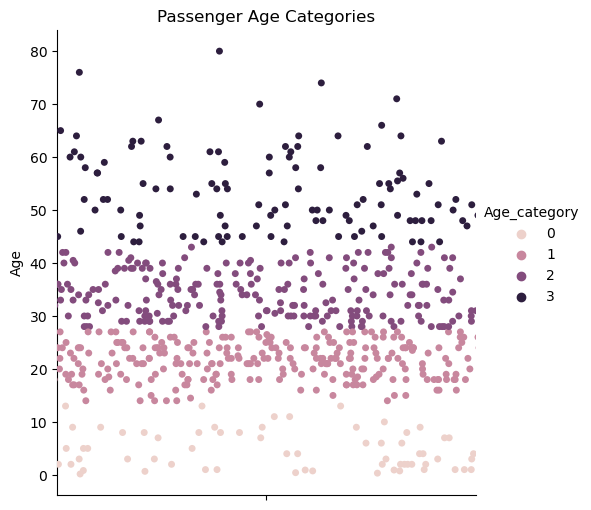

In [1016]:
# Visualizing new age clusters
sns.catplot(y='Age', data=train_age, hue='Age_category', jitter=0.8)
plt.title('Passenger Age Categories')
plt.show()

In [1017]:
# Survival rates by age category
train_age.groupby(['Age_category'])['Survived'].mean()

Age_category
0    0.591549
1    0.372180
2    0.407115
3    0.370968
Name: Survived, dtype: float64

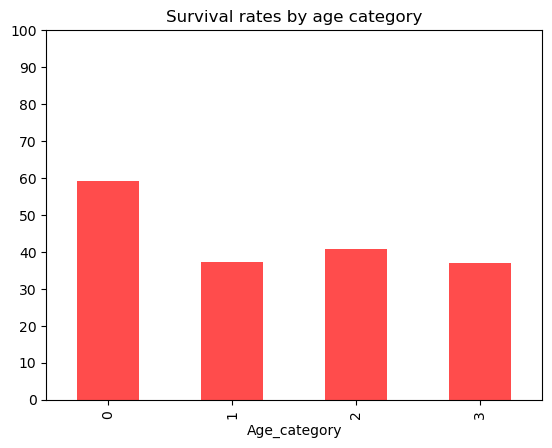

In [1018]:
train_age.groupby(['Age_category'])['Survived'].value_counts(normalize = True).unstack()[1].plot.bar(
color = ['red'], alpha=0.7)
plt.title('Survival rates by age category')
plt.yticks(ticks=np.arange(0,1.1,0.1), labels = np.arange(0, 110, 10))
plt.show()

In [1019]:
train_age.groupby(['Age_category', 'Sex'])['Survived'].mean().unstack()

Sex,female,male
Age_category,,
0,0.617647,0.567568
1,0.747475,0.149701
2,0.797753,0.195122
3,0.794872,0.176471


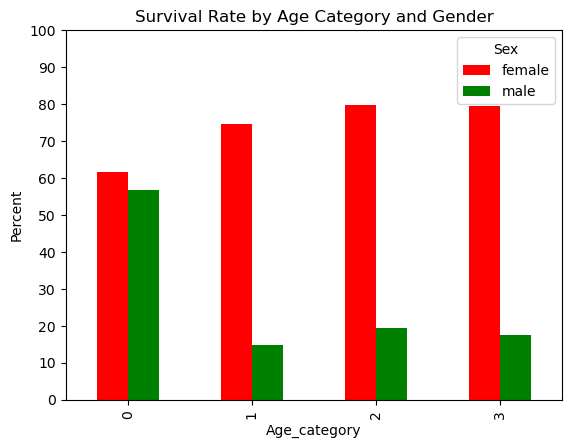

In [1020]:
train_age.groupby(['Age_category', 'Sex'])['Survived'].mean().unstack().plot.bar(
color = ['red', 'green'])
plt.title('Survival Rate by Age Category and Gender')
plt.yticks(ticks=np.arange(0,1.1,0.1), labels=np.arange(0,110,10))
plt.ylabel('Percent')
plt.show()

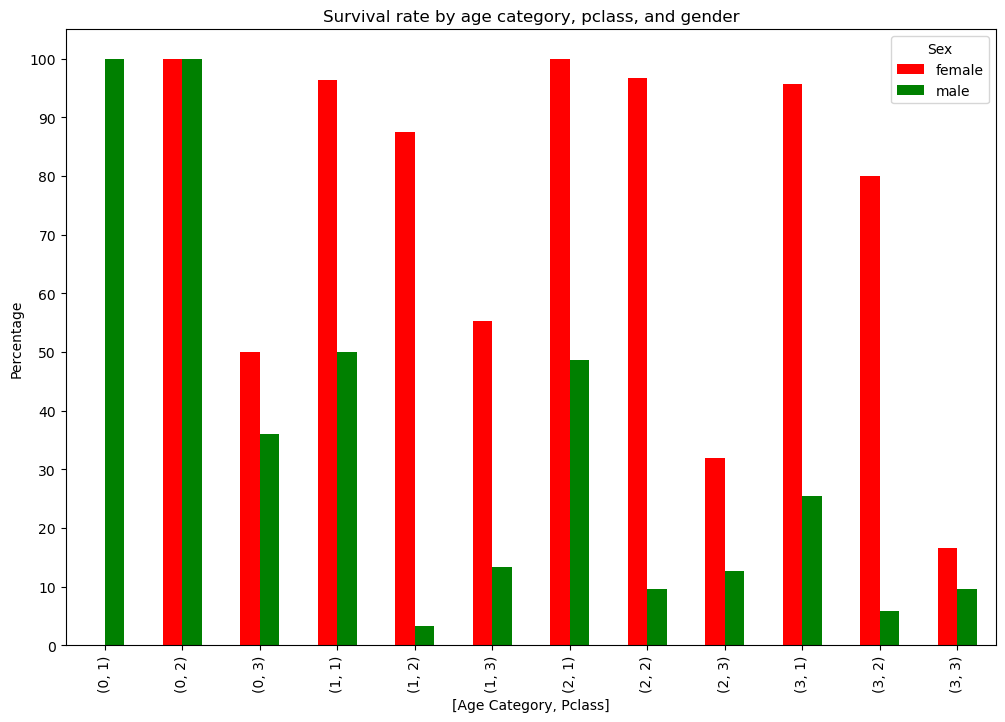

In [1021]:
train_age.groupby(['Age_category', 'Pclass', 'Sex'])['Survived'].mean().unstack().plot.bar(
figsize=(12,8), color = ['red', 'green'])
plt.title('Survival rate by age category, pclass, and gender')
plt.yticks(ticks=np.arange(0,1.1,0.1), labels=np.arange(0,110,10))
plt.ylabel('Percentage')
plt.xlabel('[Age Category, Pclass]')
plt.show()

In [1022]:
alldata = pd.concat([alldata, train_age.Age_category], axis = 1)

In [1023]:
alldata.drop(['PassengerId', 'Cabin', 'Age'], axis = 1, inplace = True)

In [1024]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    float64
 1   Pclass              1309 non-null   int64  
 2   Sex                 1309 non-null   object 
 3   SibSp               1309 non-null   int64  
 4   Parch               1309 non-null   int64  
 5   Embarked            1307 non-null   object 
 6   title               1309 non-null   object 
 7   in_WCF              1309 non-null   float64
 8   WCF_Died            1309 non-null   float64
 9   WCF_Survived        1309 non-null   float64
 10  family_size         1309 non-null   int64  
 11  ticket_group_count  1309 non-null   int64  
 12  group_size          1309 non-null   int64  
 13  is_alone            1309 non-null   int64  
 14  fare_pp             1309 non-null   float64
 15  Age_category        1046 non-null   float64
dtypes: flo

In [1025]:
alldata.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,title,in_WCF,WCF_Died,WCF_Survived,family_size,ticket_group_count,group_size,is_alone,fare_pp,Age_category
0,0.0,3,male,1,0,S,Mr,0.0,0.0,0.0,2,1,2,0,7.25000,1.0
1,1.0,1,female,1,0,C,Mrs,0.0,0.0,0.0,2,2,2,0,35.64165,2.0
2,1.0,3,female,0,0,S,Miss,0.0,0.0,0.0,1,1,1,1,7.92500,1.0
3,1.0,1,female,1,0,S,Mrs,0.0,0.0,0.0,2,2,2,0,26.55000,2.0
4,0.0,3,male,0,0,S,Mr,0.0,0.0,0.0,1,1,1,1,8.05000,2.0


### Missing values for Embarked

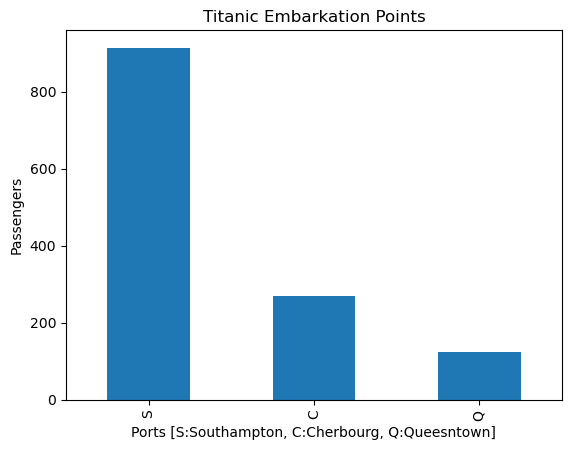

In [1026]:
alldata.Embarked.value_counts().plot.bar()
plt.title('Titanic Embarkation Points')
plt.ylabel('Passengers')
plt.xlabel('Ports [S:Southampton, C:Cherbourg, Q:Queesntown]')
plt.show()

In [1027]:
alldata[alldata.Embarked.isnull()]

,Survived,Pclass,Sex,SibSp,Parch,Embarked,title,in_WCF,WCF_Died,WCF_Survived,family_size,ticket_group_count,group_size,is_alone,fare_pp,Age_category
61,1.0,1,female,0,0,NaN,Miss,0.0,0.0,0.0,1,2,2,0,40.0,2.0
829,1.0,1,female,0,0,NaN,Mrs,0.0,0.0,0.0,1,2,2,0,40.0,3.0


In [1028]:
alldata.loc[alldata.Embarked.isnull(), 'Embarked'] = 'S'

In [1029]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    float64
 1   Pclass              1309 non-null   int64  
 2   Sex                 1309 non-null   object 
 3   SibSp               1309 non-null   int64  
 4   Parch               1309 non-null   int64  
 5   Embarked            1309 non-null   object 
 6   title               1309 non-null   object 
 7   in_WCF              1309 non-null   float64
 8   WCF_Died            1309 non-null   float64
 9   WCF_Survived        1309 non-null   float64
 10  family_size         1309 non-null   int64  
 11  ticket_group_count  1309 non-null   int64  
 12  group_size          1309 non-null   int64  
 13  is_alone            1309 non-null   int64  
 14  fare_pp             1309 non-null   float64
 15  Age_category        1046 non-null   float64
dtypes: flo

### Preprocessing - OneHotEncoding

In [1030]:
preprocessing_dummies = pd.get_dummies(alldata[['Pclass', 'Sex', 'Embarked', 'title']],
               columns = ['Pclass', 'Sex', 'Embarked', 'title'],
               prefix = ['pclass', 'sex', 'embarked', 'title'],
               drop_first= False
              )

In [1031]:
preprocessing_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pclass_1      1309 non-null   uint8
 1   pclass_2      1309 non-null   uint8
 2   pclass_3      1309 non-null   uint8
 3   sex_female    1309 non-null   uint8
 4   sex_male      1309 non-null   uint8
 5   embarked_C    1309 non-null   uint8
 6   embarked_Q    1309 non-null   uint8
 7   embarked_S    1309 non-null   uint8
 8   title_Master  1309 non-null   uint8
 9   title_Miss    1309 non-null   uint8
 10  title_Mr      1309 non-null   uint8
 11  title_Mrs     1309 non-null   uint8
 12  title_rare    1309 non-null   uint8
dtypes: uint8(13)
memory usage: 16.7 KB


In [1032]:
preprocessing_dummies.head()

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_rare
0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,0,0,1,0,1,0,0,0,0,0,1,0
2,0,0,1,1,0,0,0,1,0,1,0,0,0
3,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,1,0,0,1,0,0


In [1033]:
alldata = pd.concat([alldata, preprocessing_dummies], axis = 1)

In [1034]:
alldata.drop(['Pclass', 'Sex', 'Embarked', 'title'], axis = 1, inplace = True)


In [1035]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    float64
 1   SibSp               1309 non-null   int64  
 2   Parch               1309 non-null   int64  
 3   in_WCF              1309 non-null   float64
 4   WCF_Died            1309 non-null   float64
 5   WCF_Survived        1309 non-null   float64
 6   family_size         1309 non-null   int64  
 7   ticket_group_count  1309 non-null   int64  
 8   group_size          1309 non-null   int64  
 9   is_alone            1309 non-null   int64  
 10  fare_pp             1309 non-null   float64
 11  Age_category        1046 non-null   float64
 12  pclass_1            1309 non-null   uint8  
 13  pclass_2            1309 non-null   uint8  
 14  pclass_3            1309 non-null   uint8  
 15  sex_female          1309 non-null   uint8  
 16  sex_ma

In [1036]:
alldata.head()

,Survived,SibSp,Parch,in_WCF,WCF_Died,WCF_Survived,family_size,ticket_group_count,group_size,is_alone,...,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_rare
0,0.0,1,0,0.0,0.0,0.0,2,1,2,0,...,0,1,0,0,1,0,0,1,0,0
1,1.0,1,0,0.0,0.0,0.0,2,2,2,0,...,1,0,1,0,0,0,0,0,1,0
2,1.0,0,0,0.0,0.0,0.0,1,1,1,1,...,1,0,0,0,1,0,1,0,0,0
3,1.0,1,0,0.0,0.0,0.0,2,2,2,0,...,1,0,0,0,1,0,0,0,1,0
4,0.0,0,0,0.0,0.0,0.0,1,1,1,1,...,0,1,0,0,1,0,0,1,0,0


### Age Category - Imputation of Missing values

In [1037]:
X = alldata.loc[alldata.Age_category.notnull(), ['SibSp', 'Parch', 'in_WCF', 'WCF_Died', 'WCF_Survived',
       'family_size', 'ticket_group_count', 'group_size', 'is_alone',
       'fare_pp', 'pclass_1', 'pclass_2', 'pclass_3',
       'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S',
       'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_rare']].copy()

In [1038]:
y = alldata.loc[alldata.Age_category.notnull(), 'Age_category'].copy()

In [1039]:
scaler = StandardScaler()
fare_pp_sc_X = pd.DataFrame(scaler.fit_transform(X[['fare_pp']]), columns=['fare_pp_sc'], index = X.index)
X = pd.concat([X, fare_pp_sc_X], axis = 1).drop('fare_pp', axis=1)

In [1040]:
# Testing multiple model to impute age
models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000, random_state = 41),
    'Random Forest Classifier': RandomForestClassifier(random_state = 41),
    'Perceptron': Perceptron(random_state = 41),
    'SGD Classifier': SGDClassifier(random_state = 41),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state = 41),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Machines (SVC)': SVC(random_state = 41),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bagging Classifier' : BaggingClassifier(random_state = 41),
    "Gradient Boosting": GradientBoostingClassifier(random_state=41),
    'XGBC' : XGBClassifier(random_state = 41),
    'Hist Gradient Boosting Classifier' : HistGradientBoostingClassifier(random_state = 41),
    'LGBM' : LGBMClassifier(random_state = 41),
    'ADABoost' : AdaBoostClassifier(random_state=41),
    'ExtraTreesClassifier' : ExtraTreesClassifier(random_state = 41),
    'RidgeClassifier' : RidgeClassifier(random_state = 41)
}

In [1041]:
scores = {}
kf = KFold(n_splits=20, random_state=41, shuffle=True)
for name, model in models.items():
    cv = cross_val_score(model, X, y, cv = kf)
    scores[name] = cv
    print(f"Model {name} Average Accuracy Score is: {np.mean(scores[name])*100:.2f}% and the STD is: {np.std(scores[name])*100:.2f}%")

Model Logistic Regression Average Accuracy Score is: 53.91% and the STD is: 5.03%
Model Random Forest Classifier Average Accuracy Score is: 54.70% and the STD is: 6.56%
Model Perceptron Average Accuracy Score is: 44.85% and the STD is: 7.44%
Model SGD Classifier Average Accuracy Score is: 45.62% and the STD is: 9.37%
Model Decision Tree Classifier Average Accuracy Score is: 54.22% and the STD is: 7.33%
Model K-Nearest Neighbors Classifier Average Accuracy Score is: 51.85% and the STD is: 5.87%
Model Support Vector Machines (SVC) Average Accuracy Score is: 57.25% and the STD is: 6.15%
Model Gaussian Naive Bayes Average Accuracy Score is: 44.34% and the STD is: 4.74%
Model Bagging Classifier Average Accuracy Score is: 53.26% and the STD is: 5.97%
Model Gradient Boosting Average Accuracy Score is: 57.55% and the STD is: 6.61%
Model XGBC Average Accuracy Score is: 57.28% and the STD is: 5.86%
Model Hist Gradient Boosting Classifier Average Accuracy Score is: 57.28% and the STD is: 6.24%
Mo

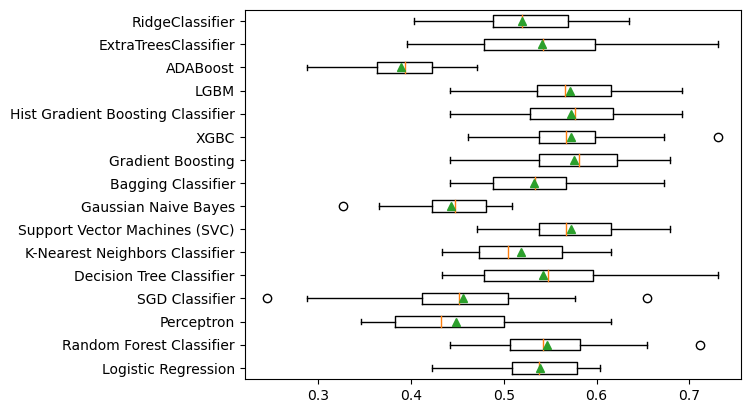

In [1042]:
data = [value for value in scores.values()]
labels = list(scores.keys())
plt.boxplot(data, labels=labels, showmeans=True, vert=False)
plt.show()

In [1043]:
# Fiting GBC on  X_train_a
svc = SVC(random_state = 41)
svc.fit(X, y)

SVC(random_state=41)

In [1044]:
X_test_cat_age_imp =  alldata.loc[alldata.Age_category.isna(), ['SibSp', 'Parch', 'in_WCF', 'WCF_Died', 'WCF_Survived',
       'family_size', 'ticket_group_count', 'group_size', 'is_alone',
       'fare_pp', 'pclass_1', 'pclass_2', 'pclass_3',
       'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S',
       'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_rare']]

In [1045]:
# scaling fare per passenger X_test_imputation
fare_pp_sc_test_imputation = pd.DataFrame(scaler.transform(X_test_cat_age_imp[['fare_pp']]), columns =['fare_pp_sc'], index = X_test_cat_age_imp.index)

In [1046]:
X_test_cat_age_imp = pd.concat([X_test_cat_age_imp, fare_pp_sc_test_imputation], axis = 1).drop('fare_pp', axis=1)

In [1047]:
imputation_cat_age = svc.predict(X_test_cat_age_imp)

In [1048]:
alldata.loc[alldata.Age_category.isnull(), 'Age_category'] = imputation_cat_age

In [1049]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    float64
 1   SibSp               1309 non-null   int64  
 2   Parch               1309 non-null   int64  
 3   in_WCF              1309 non-null   float64
 4   WCF_Died            1309 non-null   float64
 5   WCF_Survived        1309 non-null   float64
 6   family_size         1309 non-null   int64  
 7   ticket_group_count  1309 non-null   int64  
 8   group_size          1309 non-null   int64  
 9   is_alone            1309 non-null   int64  
 10  fare_pp             1309 non-null   float64
 11  Age_category        1309 non-null   float64
 12  pclass_1            1309 non-null   uint8  
 13  pclass_2            1309 non-null   uint8  
 14  pclass_3            1309 non-null   uint8  
 15  sex_female          1309 non-null   uint8  
 16  sex_ma

### Clean and ready to use Train and Test split

In [1050]:
train_clean = alldata.loc[alldata.Survived.notnull()].copy()


In [1051]:
test_clean = alldata.loc[alldata.Survived.isnull()].drop('Survived', axis = 1).copy()


In [1052]:
# Split independent and dependent variables from train_clean
X = train_clean.drop('Survived', axis = 1)
y = train_clean.Survived

In [1053]:
scaler = StandardScaler()

In [1054]:
X_fare_sc = pd.DataFrame(scaler.fit_transform(X[['fare_pp']]), columns=['fare_pp_sc'], index = X.fare_pp.index)

In [1055]:
test_clean_fare_sc = pd.DataFrame(scaler.transform(test_clean[['fare_pp']]), columns=['fare_pp_sc'], index = test_clean.fare_pp.index)

In [1056]:
X = pd.concat([X, X_fare_sc], axis = 1).drop('fare_pp', axis = 1)

In [1057]:
test_clean = pd.concat([test_clean, test_clean_fare_sc], axis = 1).drop('fare_pp', axis = 1)

# MODELING

In [1058]:
X.columns

Index(['SibSp', 'Parch', 'in_WCF', 'WCF_Died', 'WCF_Survived', 'family_size',
       'ticket_group_count', 'group_size', 'is_alone', 'Age_category',
       'pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S', 'title_Master', 'title_Miss',
       'title_Mr', 'title_Mrs', 'title_rare', 'fare_pp_sc'],
      dtype='object')

In [1059]:
features = ['in_WCF', 'WCF_Died', 'WCF_Survived', 'family_size', 'group_size', 'is_alone', 'Age_category',
       'pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S', 'title_Master', 'title_Miss',
       'title_Mr', 'title_Mrs', 'title_rare', 'fare_pp_sc']

In [1060]:
X = X[features].copy()

In [1061]:
X.head()

,in_WCF,WCF_Died,WCF_Survived,family_size,group_size,is_alone,Age_category,pclass_1,pclass_2,pclass_3,...,sex_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_rare,fare_pp_sc
0,0.0,0.0,0.0,2,2,0,1.0,0,0,1,...,1,0,0,1,0,0,1,0,0,-0.538133
1,0.0,0.0,0.0,2,2,0,2.0,1,0,0,...,0,1,0,0,0,0,0,1,0,1.554499
2,0.0,0.0,0.0,1,1,1,1.0,0,0,1,...,0,0,0,1,0,1,0,0,0,-0.488382
3,0.0,0.0,0.0,2,2,0,2.0,1,0,0,...,0,0,0,1,0,0,0,1,0,0.884390
4,0.0,0.0,0.0,1,1,1,2.0,0,0,1,...,1,0,0,1,0,0,1,0,0,-0.479169


In [1062]:
models = {
    'Logistic Regression': LogisticRegression(max_iter = 500, random_state = 41),
    'Random Forest Classifier': RandomForestClassifier(random_state = 41),
    'Perceptron': Perceptron(random_state = 41),
    'SGD Classifier': SGDClassifier(random_state = 41),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state = 41),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Machines (SVC)': SVC(random_state = 41),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bagging Classifier' : BaggingClassifier(random_state = 41),
    "Gradient Boosting": GradientBoostingClassifier(random_state=41),
    'XGBC' : XGBClassifier(random_state = 41),
    'Hist Gradient Boosting Classifier' : HistGradientBoostingClassifier(random_state = 41),
    'LGBM' : LGBMClassifier(random_state = 41),
    'ADABoost' : AdaBoostClassifier(random_state=41),
    'ExtraTreesClassifier' : ExtraTreesClassifier(random_state = 41)
}

In [1063]:
accuracy_scores = {}

skf = StratifiedKFold(n_splits = 20, random_state = 41, shuffle = True)

for name, model in models.items():
        cv = cross_val_score(model, X, y, cv = skf)
        accuracy_scores[name] = cv
        print(f"Model {name} Accuracy Scores is {np.mean(accuracy_scores[name])*100:.2f}% and the std is {np.std(accuracy_scores[name])*100:.2f}%")

Model Logistic Regression Accuracy Scores is 85.43% and the std is 5.39%
Model Random Forest Classifier Accuracy Scores is 82.74% and the std is 5.66%
Model Perceptron Accuracy Scores is 77.90% and the std is 12.62%
Model SGD Classifier Accuracy Scores is 82.86% and the std is 7.34%
Model Decision Tree Classifier Accuracy Scores is 82.28% and the std is 5.35%
Model K-Nearest Neighbors Classifier Accuracy Scores is 83.63% and the std is 5.12%
Model Support Vector Machines (SVC) Accuracy Scores is 86.00% and the std is 5.53%
Model Gaussian Naive Bayes Accuracy Scores is 84.76% and the std is 5.85%
Model Bagging Classifier Accuracy Scores is 84.32% and the std is 5.32%
Model Gradient Boosting Accuracy Scores is 86.22% and the std is 4.66%
Model XGBC Accuracy Scores is 84.77% and the std is 5.34%
Model Hist Gradient Boosting Classifier Accuracy Scores is 84.20% and the std is 4.81%
Model LGBM Accuracy Scores is 84.31% and the std is 5.04%
Model ADABoost Accuracy Scores is 85.99% and the st

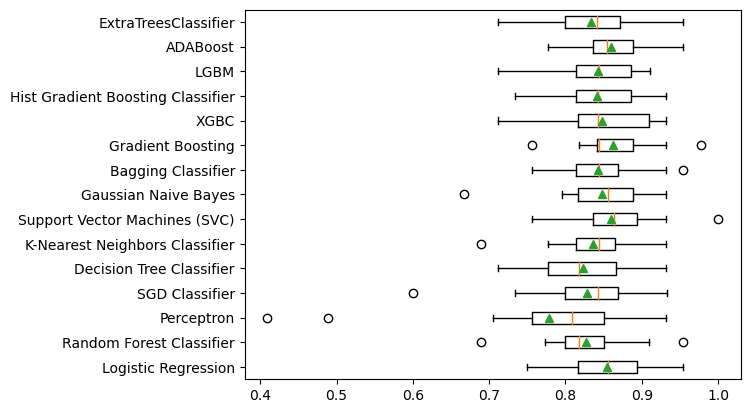

In [1064]:
data = [value for value in accuracy_scores.values()]
labels = list(accuracy_scores.keys())
plt.boxplot(data, labels = labels, showmeans = True, vert = False)
plt.show()

In [1065]:
model = GradientBoostingClassifier()
model.fit(X, y)
y_hat = model.predict(test_clean[features])
pd.DataFrame({
     'PassengerId': test.PassengerId,
     'Survived' : y_hat.astype(int)
 }).to_csv('submission-version-2-gradient-boosting.csv', index = False)

In [1066]:
model = SVC()
model.fit(X, y)
y_hat = model.predict(test_clean[features])
pd.DataFrame({
     'PassengerId': test.PassengerId,
     'Survived' : y_hat.astype(int)
 }).to_csv('submission-version-2-svc.csv', index = False)

In [1067]:
model = AdaBoostClassifier()
model.fit(X, y)
y_hat = model.predict(test_clean[features])
pd.DataFrame({
     'PassengerId': test.PassengerId,
     'Survived' : y_hat.astype(int)
 }).to_csv('submission-version-2-ada-boost.csv', index = False)